<a href="https://colab.research.google.com/github/aqilaaprillia/MachineLearning/blob/main/H071201088_NUR_AQILA_APRILLIA_A_PERTEMUAN_6_PRAKTISI(CLUSTERING).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CLUSSTERING **



Setiap algoritma Clusstering hadir dalam dua varian: kelas, yang mengimplementasikan fitmetode untuk mempelajari cluster pada data kereta, dan fungsi, yang, diberikan data kereta, mengembalikan larik label bilangan bulat yang sesuai dengan cluster yang berbeda. Untuk kelas, label di atas data pelatihan dapat ditemukan di labels_atribut.



**K-MEANS**

Algoritme mengelompokkan data dengan mencoba memisahkan sampel dalam n kelompok dengan varians yang sama, meminimalkan kriteria yang dikenal sebagai inersia atau jumlah kuadrat dalam cluster (lihat di bawah). Algoritma ini membutuhkan jumlah cluster yang akan ditentukan. Ini menskalakan dengan baik untuk sejumlah besar sampel dan telah digunakan di berbagai area aplikasi di berbagai bidang.

In [2]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [3]:
kmeans.predict([[0, 0], [12, 3]])

array([1, 0], dtype=int32)

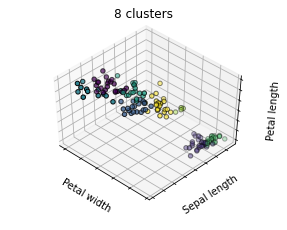

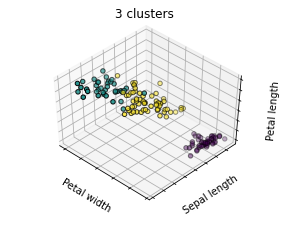

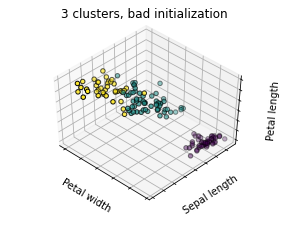

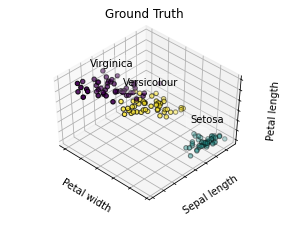

In [4]:
#k-Means clustering
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fignum = 1
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
    ax.set_position([0, 0, 0.95, 1])
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")
ax.dist = 12

fig.show()

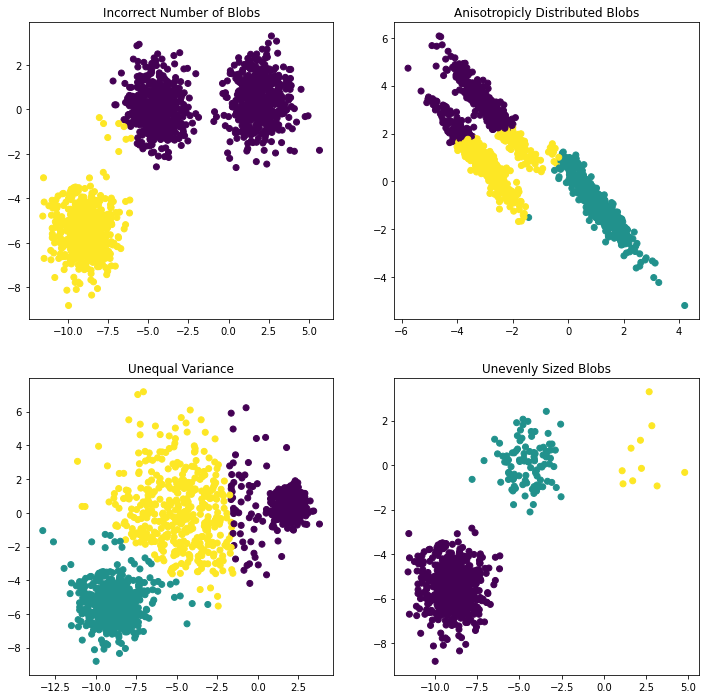

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

**Mini Batch K-Means**

MiniBatchKMeans adalah varian dari algoritma KMeans yang menggunakan mini-batch untuk mengurangi waktu komputasi, sambil tetap berusaha mengoptimalkan fungsi tujuan yang sama. Mini-batch adalah subset dari data input, yang diambil sampelnya secara acak di setiap iterasi pelatihan. Mini-batch ini secara drastis mengurangi jumlah komputasi yang diperlukan untuk konvergen ke solusi lokal. Berbeda dengan algoritma lain yang mengurangi waktu konvergensi k-means, k-means mini-batch menghasilkan hasil yang umumnya hanya sedikit lebih buruk daripada algoritma standar.

In [6]:
import numpy as np
from sklearn.datasets import make_blobs

np.random.seed(0)

batch_size = 45
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)

In [7]:
import time
from sklearn.cluster import KMeans

k_means = KMeans(init="k-means++", n_clusters=3, n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

In [8]:
from sklearn.cluster import MiniBatchKMeans

mbk = MiniBatchKMeans(
    init="k-means++",
    n_clusters=3,
    batch_size=batch_size,
    n_init=10,
    max_no_improvement=10,
    verbose=0,
)
t0 = time.time()
mbk.fit(X)
t_mini_batch = time.time() - t0

In [9]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

k_means_cluster_centers = k_means.cluster_centers_
order = pairwise_distances_argmin(k_means.cluster_centers_, mbk.cluster_centers_)
mbk_means_cluster_centers = mbk.cluster_centers_[order]

k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)

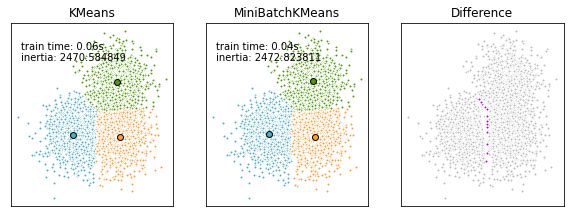

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ["#4EACC5", "#FF9C34", "#4E9A06"]

# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor=col, marker=".")
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=6,
    )
ax.set_title("KMeans")
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, "train time: %.2fs\ninertia: %f" % (t_batch, k_means.inertia_))

# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == k
    cluster_center = mbk_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor=col, marker=".")
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=6,
    )
ax.set_title("MiniBatchKMeans")
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, "train time: %.2fs\ninertia: %f" % (t_mini_batch, mbk.inertia_))

# Initialize the different array to all False
different = mbk_means_labels == 4
ax = fig.add_subplot(1, 3, 3)

for k in range(n_clusters):
    different += (k_means_labels == k) != (mbk_means_labels == k)

identic = np.logical_not(different)
ax.plot(X[identic, 0], X[identic, 1], "w", markerfacecolor="#bbbbbb", marker=".")
ax.plot(X[different, 0], X[different, 1], "w", markerfacecolor="m", marker=".")
ax.set_title("Difference")
ax.set_xticks(())
ax.set_yticks(())

plt.show()

**Affinity Propagation** 

menciptakan cluster dengan mengirimkan pesan antara pasangan sampel sampai konvergensi. Dataset kemudian dideskripsikan menggunakan sejumlah kecil eksemplar, yang diidentifikasi sebagai yang paling mewakili sampel lainnya. Pesan yang dikirim antara pasangan mewakili kesesuaian untuk satu sampel menjadi contoh yang lain, yang diperbarui sebagai tanggapan terhadap nilai dari pasangan lain. Pembaruan ini terjadi berulang-ulang sampai konvergensi, di mana titik eksemplar terakhir dipilih, dan karenanya pengelompokan akhir diberikan.

**Demo of affinity propagation clustering algorithm**

In [11]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

In [12]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=300, centers=centers, cluster_std=0.5, random_state=0
)

In [13]:
af = AffinityPropagation(preference=-50, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean")
)

Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


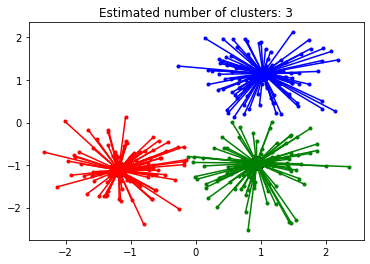

In [14]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.close("all")
plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

**Mean Shift clustering** 

bertujuan untuk menemukan gumpalan dalam kepadatan sampel yang halus. Ini adalah algoritma berbasis centroid, yang bekerja dengan memperbarui kandidat centroid menjadi rata-rata poin dalam wilayah tertentu. Kandidat-kandidat ini kemudian disaring dalam tahap pasca-pemrosesan untuk menghilangkan duplikasi-dekat untuk membentuk set centroid akhir

A demo of the mean-shift clustering algorithm

In [15]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

In [16]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

In [17]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


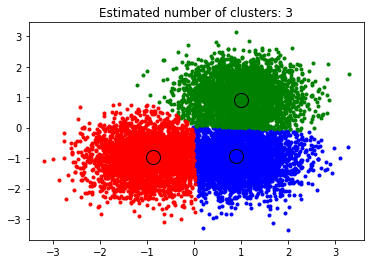

In [18]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

**Spectral Clustering**

melakukan penyisipan dimensi rendah dari matriks afinitas antara sampel, diikuti dengan pengelompokan, misalnya, oleh KMeans, dari komponen vektor eigen dalam ruang dimensi rendah. Ini sangat efisien secara komputasi jika matriks afinitas jarang dan amgpemecah digunakan untuk masalah nilai eigen (Catatan, amgpemecah mengharuskan modul pyamg diinstal.)

Versi SpectralClustering saat ini membutuhkan jumlah cluster yang ditentukan terlebih dahulu. Ini bekerja dengan baik untuk sejumlah kecil cluster, tetapi tidak disarankan untuk banyak cluster.

Spectral clustering for image segmentation

In [19]:
import numpy as np

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1**2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2**2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3**2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4**2

In [20]:
img = circle1 + circle2 + circle3 + circle4

# We use a mask that limits to the foreground: the problem that we are
# interested in here is not separating the objects from the background,
# but separating them one from the other.
mask = img.astype(bool)

img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

In [21]:
from sklearn.feature_extraction import image

graph = image.img_to_graph(img, mask=mask)

In [22]:
graph.data = np.exp(-graph.data / graph.data.std())

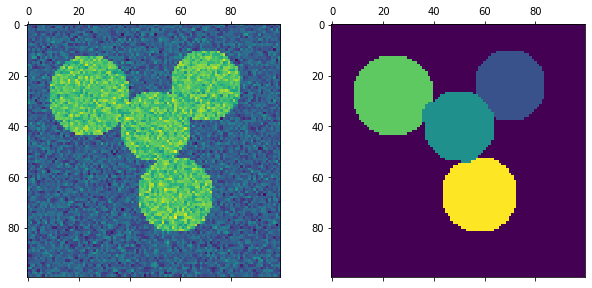

In [23]:
from sklearn.cluster import spectral_clustering
import matplotlib.pyplot as plt

labels = spectral_clustering(graph, n_clusters=4, eigen_solver="arpack")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].matshow(img)
axs[1].matshow(label_im)

plt.show()

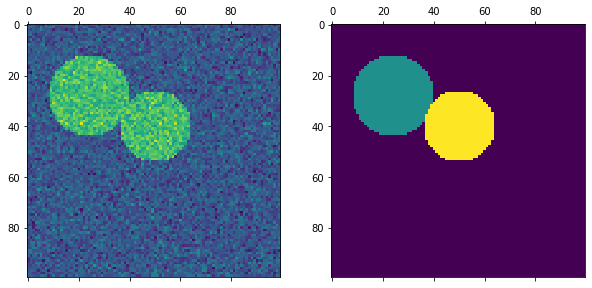

In [24]:
img = circle1 + circle2
mask = img.astype(bool)
img = img.astype(float)

img += 1 + 0.2 * np.random.randn(*img.shape)

graph = image.img_to_graph(img, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())

labels = spectral_clustering(graph, n_clusters=2, eigen_solver="arpack")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].matshow(img)
axs[1].matshow(label_im)

plt.show()

**Hierarchical clustering** 

algoritma pengelompokan yang membangun cluster bersarang dengan menggabungkan atau memisahkannya secara berurutan. Hirarki cluster ini direpresentasikan sebagai pohon (atau dendrogram). Akar pohon adalah cluster unik yang mengumpulkan semua sampel, daun menjadi cluster dengan hanya satu sampel. Lihat halaman Wikipedia untuk lebih jelasnya.

**DBSCAN**

Algoritme DBSCANmemandang cluster sebagai area dengan kepadatan tinggi yang dipisahkan oleh area dengan kepadatan rendah. Karena pandangan yang agak umum ini, cluster yang ditemukan oleh DBSCAN dapat berbentuk apa saja, berbeda dengan k-means yang mengasumsikan bahwa cluster berbentuk cembung. Komponen utama dari DBSCAN adalah konsep sampel inti , yaitu sampel yang berada di daerah dengan kepadatan tinggi. Oleh karena itu, cluster adalah sekumpulan sampel inti, masing-masing berdekatan satu sama lain (diukur dengan beberapa ukuran jarak) dan satu set sampel non-inti yang dekat dengan sampel inti (tetapi bukan sampel inti itu sendiri). Ada dua parameter untuk algoritme, min_samplesdan eps, yang mendefinisikan secara formal apa yang kami maksud ketika kami mengatakan padat . Lebih tinggi min_samplesatau lebih rendaheps menunjukkan kepadatan yang lebih tinggi yang diperlukan untuk membentuk sebuah cluster.



Demo of DBSCAN clustering algorithm

In [25]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [26]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

In [27]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


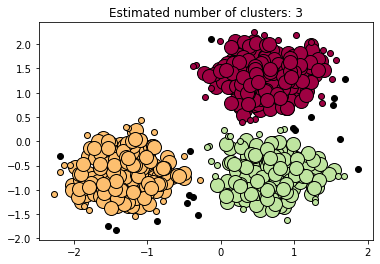

In [28]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

**OPTICS**

memiliki banyak kesamaan dengan DBSCAN algoritme, dan dapat dianggap sebagai generalisasi DBSCAN yang mengurangi epspersyaratan dari nilai tunggal ke rentang nilai. Perbedaan utama antara DBSCAN dan OPTICS adalah bahwa algoritma OPTICS membangun grafik reachability , yang memberikan masing-masing sampel reachability_jarak, dan tempat dalam ordering_atribut cluster; kedua atribut ini ditetapkan ketika model dipasang, dan digunakan untuk menentukan keanggotaan cluster. Jika OPTICS dijalankan dengan nilai default inf yang ditetapkan untuk max_eps, maka ekstraksi klaster gaya DBSCAN dapat dilakukan berulang kali dalam waktu linier untuk setiap epsnilai yang diberikan menggunakan cluster_optics_dbscanmetode tersebut. Pengaturan max_epske nilai yang lebih rendah akan menghasilkan waktu lari yang lebih pendek, dan dapat dianggap sebagai radius lingkungan maksimum dari setiap titik untuk menemukan titik potensial lain yang dapat dijangkau.



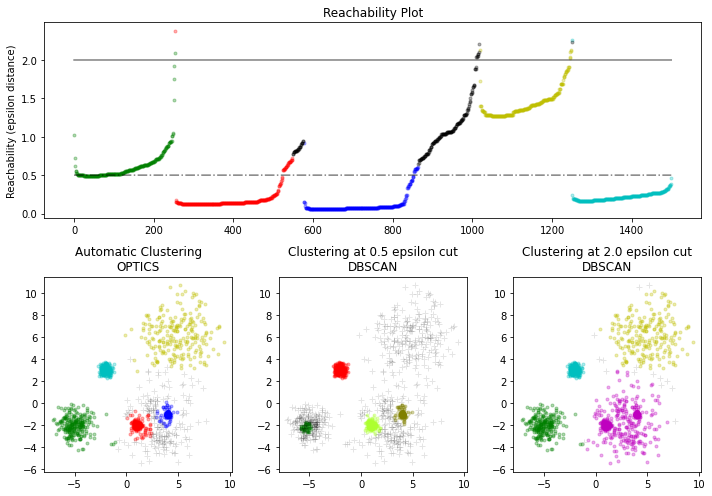

In [33]:
# Authors: Shane Grigsby <refuge@rocktalus.com>
#          Adrin Jalali <adrin.jalali@gmail.com>
# License: BSD 3 clause

from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data

np.random.seed(0)
n_points_per_cluster = 250

C1 = [-5, -2] + 0.8 * np.random.randn(n_points_per_cluster, 2)
C2 = [4, -1] + 0.1 * np.random.randn(n_points_per_cluster, 2)
C3 = [1, -2] + 0.2 * np.random.randn(n_points_per_cluster, 2)
C4 = [-2, 3] + 0.3 * np.random.randn(n_points_per_cluster, 2)
C5 = [3, -2] + 1.6 * np.random.randn(n_points_per_cluster, 2)
C6 = [5, 6] + 2 * np.random.randn(n_points_per_cluster, 2)
X = np.vstack((C1, C2, C3, C4, C5, C6))

clust = OPTICS(min_samples=50, xi=0.05, min_cluster_size=0.05)

# Run the fit
clust.fit(X)

labels_050 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=0.5,
)
labels_200 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=2,
)

space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax1.plot(space, np.full_like(space, 2.0, dtype=float), "k-", alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), "k-.", alpha=0.5)
ax1.set_ylabel("Reachability (epsilon distance)")
ax1.set_title("Reachability Plot")

# OPTICS
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], "k+", alpha=0.1)
ax2.set_title("Automatic Clustering\nOPTICS")

# DBSCAN at 0.5
colors = ["g", "greenyellow", "olive", "r", "b", "c"]
for klass, color in zip(range(0, 6), colors):
    Xk = X[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker=".")
ax3.plot(X[labels_050 == -1, 0], X[labels_050 == -1, 1], "k+", alpha=0.1)
ax3.set_title("Clustering at 0.5 epsilon cut\nDBSCAN")

# DBSCAN at 2.
colors = ["g.", "m.", "y.", "c."]
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(X[labels_200 == -1, 0], X[labels_200 == -1, 1], "k+", alpha=0.1)
ax4.set_title("Clustering at 2.0 epsilon cut\nDBSCAN")

plt.tight_layout()
plt.show()

**BIRTCH**

 Birch pohon yang disebut Clustering Feature Tree (CFT) untuk data yang diberikan. Data pada dasarnya dikompresi secara lossy ke satu set node Fitur Clustering (CF Nodes). CF Node memiliki sejumlah subcluster yang disebut Clustering Feature subcluster (CF Subcluster) dan CF Subcluster ini terletak di CF Node non-terminal dapat memiliki CF Nodes sebagai anak.

KEUNTUNGAN

- Interpretabilitas : Indeks Rand yang tidak disesuaikan sebanding dengan jumlah 
pasangan sampel yang labelnya sama di keduanya labels_preddan labels_true, atau berbeda di keduanya.

- Penetapan label acak (seragam) memiliki skor indeks Rand yang disesuaikan mendekati 0,0 untuk setiap nilai n_clustersdan n_samples(yang tidak berlaku untuk indeks Rand yang tidak disesuaikan atau ukuran-V misalnya).

- Rentang terbatas : Nilai yang lebih rendah menunjukkan pelabelan yang berbeda, pengelompokan serupa memiliki indeks Rand yang tinggi (disesuaikan atau tidak disesuaikan), 1,0 adalah skor kecocokan yang sempurna. Rentang skor adalah [0, 1] untuk indeks Rand yang tidak disesuaikan dan [-1, 1] untuk indeks Rand yang disesuaikan.

- Tidak ada asumsi yang dibuat pada struktur cluster : Indeks Rand (disesuaikan atau tidak disesuaikan) dapat digunakan untuk membandingkan semua jenis algoritma pengelompokan, dan dapat digunakan untuk membandingkan algoritma pengelompokan seperti k-means yang mengasumsikan bentuk gumpalan isotropik dengan hasil spektral algoritma clustering yang dapat menemukan cluster dengan bentuk "dilipat".


KEKURANGAN

- Berlawanan dengan inersia, indeks Rand (disesuaikan atau tidak disesuaikan) membutuhkan pengetahuan tentang kelas kebenaran dasar yang hampir tidak pernah tersedia dalam praktik atau memerlukan penugasan manual oleh annotator manusia (seperti dalam pengaturan pembelajaran yang diawasi).

- Namun (disesuaikan atau tidak disesuaikan) indeks Rand juga dapat berguna dalam pengaturan murni tanpa pengawasan sebagai blok bangunan untuk Indeks Konsensus yang dapat digunakan untuk pemilihan model pengelompokan (TODO).

- Indeks Rand yang tidak disesuaikan seringkali mendekati 1,0 bahkan jika pengelompokan itu sendiri berbeda secara signifikan. Hal ini dapat dipahami ketika menginterpretasikan indeks Rand sebagai akurasi pelabelan pasangan elemen yang dihasilkan dari pengelompokan: Dalam praktiknya sering ada sebagian besar pasangan elemen yang diberi differentlabel pasangan di bawah prediksi dan pengelompokan kebenaran dasar yang menghasilkan tinggi proporsi label pasangan yang setuju, yang kemudian mengarah ke skor tinggi.